In [71]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neural_network import *
from sklearn.metrics import *
import xgboost as xgb
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,10)
import seaborn as sns
from ipynb.fs.full.Performance_Utilities import calculate_optimal_threshold, print_metrics
from utils.create_features_utils import *
from sklearn.base import clone
import os

In [100]:
raw_tennis_file = "data/mens/combined_raw_data.csv"
round_16_file = "data/wimbledon_2019.csv"
full_file = "data/all_matches_with_feature.csv"

In [109]:
round_16 = pd.read_csv(round_16_file) # Round of 16 and on from Wimbledon 2019
raw_tennis = pd.read_csv(raw_tennis_file) # Raw tennis file
full_tennis = pd.read_csv(full_file) # All match results from all years

In [110]:
features_list = [
 'diff_rank',
 'diff_match_win_percent',
 'diff_games_win_percent',
 'diff_5_set_match_win_percent',
 'diff_close_sets_percent',
 'diff_match_win_percent_grass',
 'diff_games_win_percent_grass',
 'diff_5_set_match_win_percent_grass',
 'diff_close_sets_percent_grass',
 'diff_match_win_percent_52',
 'diff_games_win_percent_52',
 'diff_5_set_match_win_percent_52',
 'diff_close_sets_percent_52',
 'diff_match_win_percent_grass_60',
 'diff_games_win_percent_grass_60',
 'diff_5_set_match_win_percent_grass_60',
 'diff_close_sets_percent_grass_60',
 'diff_match_win_percent_hh',
 'diff_games_win_percent_hh',
 'diff_match_win_percent_grass_hh',
 'diff_games_win_percent_grass_hh']

In [111]:
full_tennis = full_tennis.dropna()

full_tennis['diff_rank'] = full_tennis['player_0_rank'] - full_tennis['player_1_rank']

In [115]:
# Train-test split
y = full_tennis.outcome
X = full_tennis[features_list]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, shuffle=True, test_size=0.20)


(24244, 21)


In [7]:
# Final to predict on
round_16['Date'] = '2019/07/07'
round_16['Surface'] = 'Grass'
round_16['diff_rank'] = round_16['player_0_rank'] - round_16['player_1_rank']

wimby_2019 = create_features(round_16, raw_tennis) # Round 16 and on Wimby 2019
X_wimby_2019 = wimby_2019[features_list]

Creating Player Career Stats All Surface
Creating Player Career Stats on Grass/Clay/Hard
Creating Player Career Stats All Surface Last 52 Weeks
Creating Player Career Stats on Grass/Clay/Hard Last 60 Weeks
Creating Player Head to Head Career Stats All Surface
Creating Player Head to Head Career Stats On Grass
Creating Difference Variables


In [117]:
nn = MLPClassifier(alpha = .0001, activation='relu', hidden_layer_sizes = 15)
nn.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=15, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:1143: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


,Model,Accuracy,True Positive Rate,True Negative Rate,False Positive Rate,False Negative Rate,Sensitivity,Specificity,AUC,F1-Score,Geometric Mean,Kappa-Statistics,Sklearn Version
0,NN,0.678,0.258,0.89,0.11,0.742,0.258,0.89,0.671,0.35,0.479,0.17,0.22


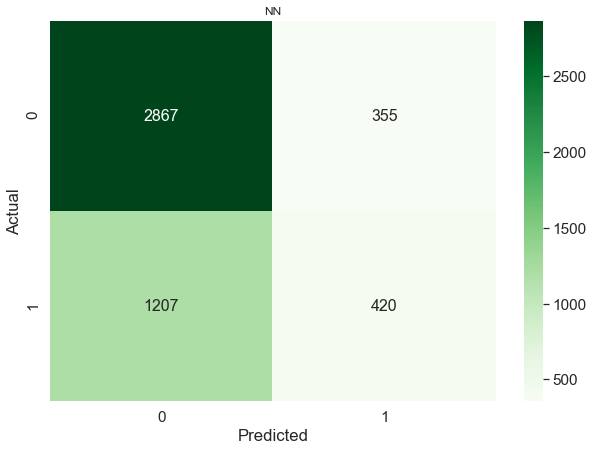

In [118]:
print_metrics(X_test, y_test, nn, "NN")[1]

[(1e-05, 5), (1e-05, 7), (1e-05, 10), (1e-05, 15), (1e-05, 20), (0.0001, 5), (0.0001, 7), (0.0001, 10), (0.0001, 15), (0.0001, 20), (0.001, 5), (0.001, 7), (0.001, 10), (0.001, 15), (0.001, 20)]


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:1143: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:1143: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:1143: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:1143: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:1143: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http

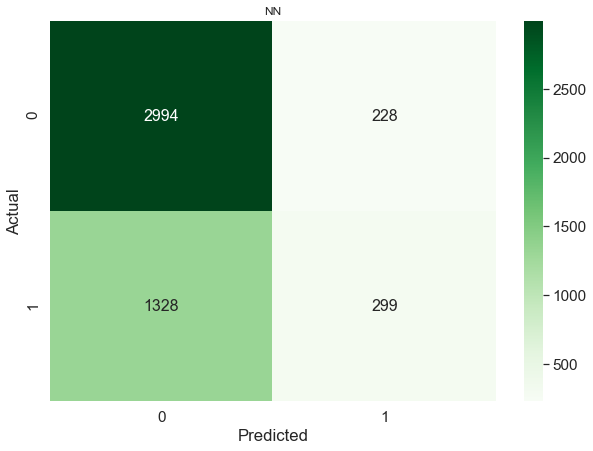

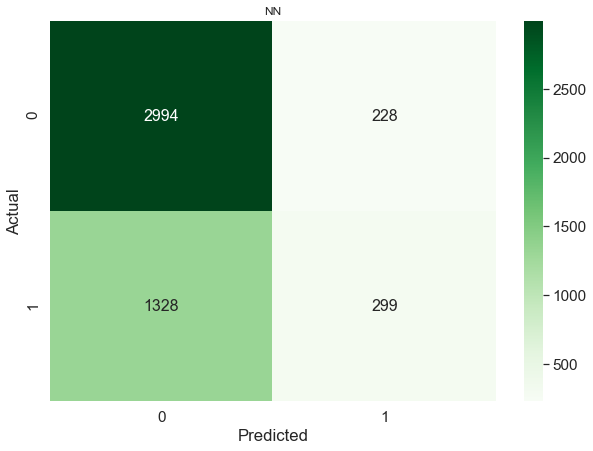

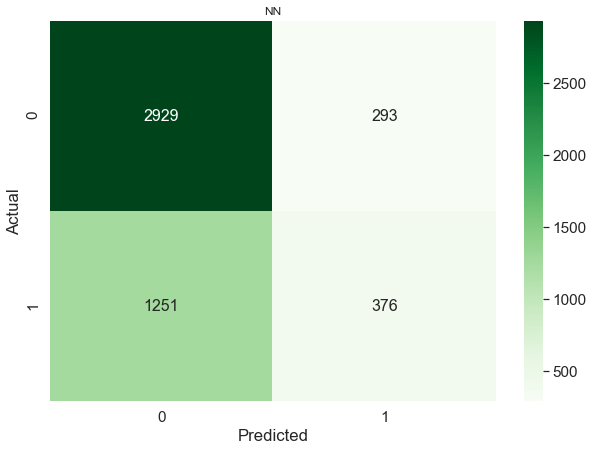

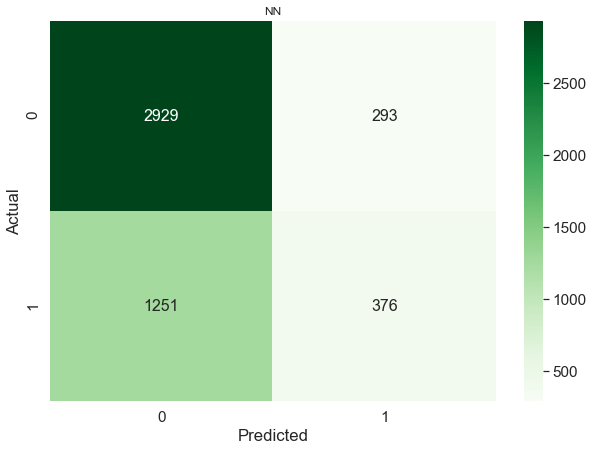

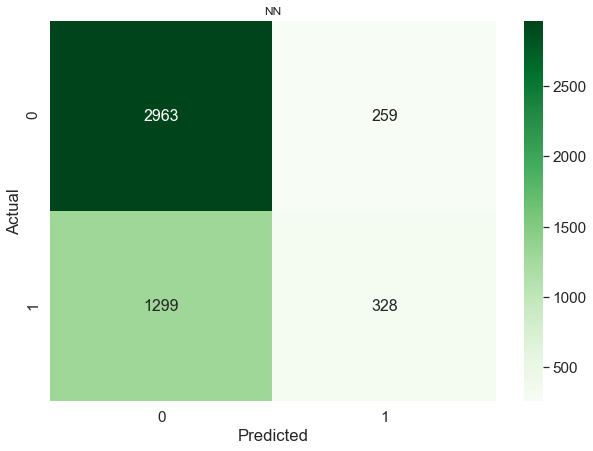

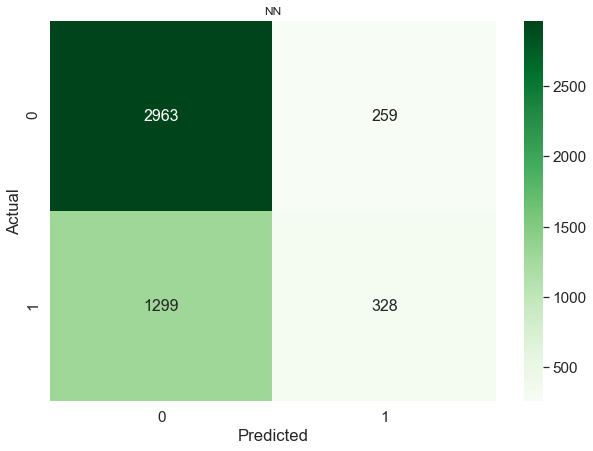

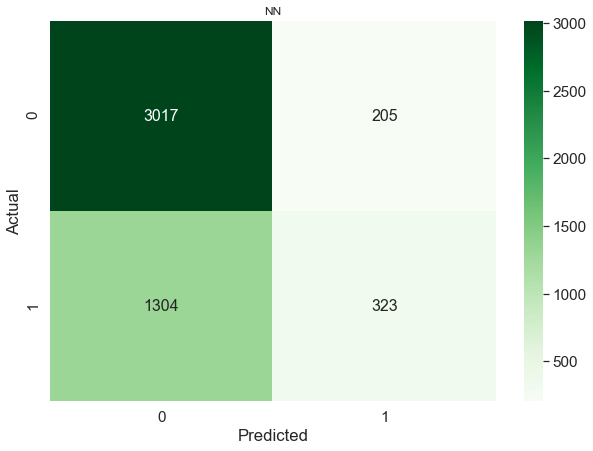

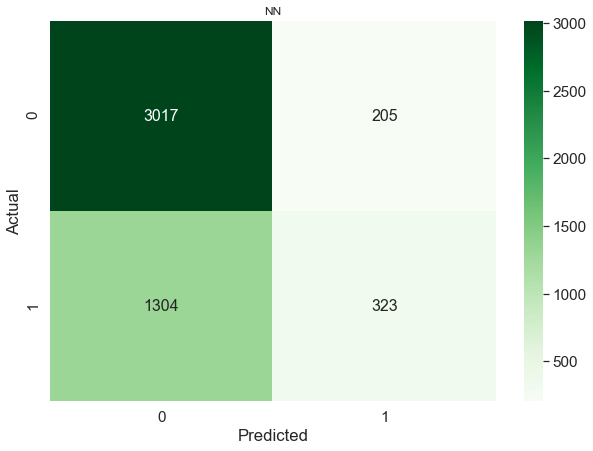

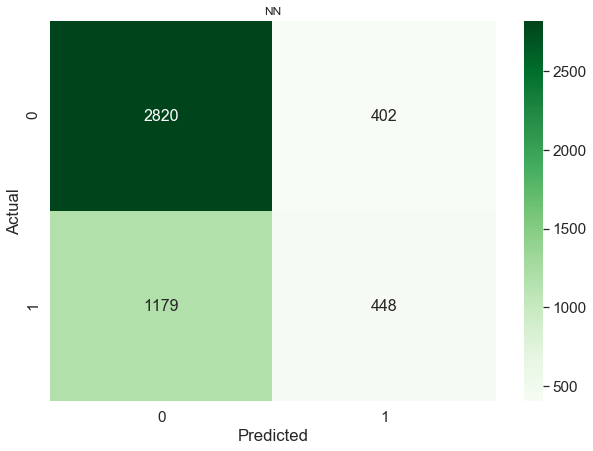

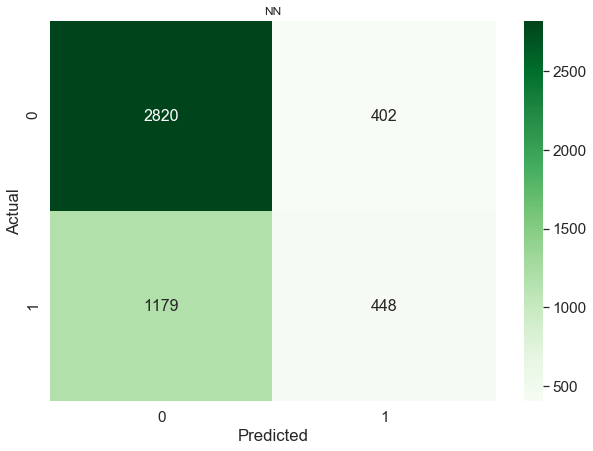

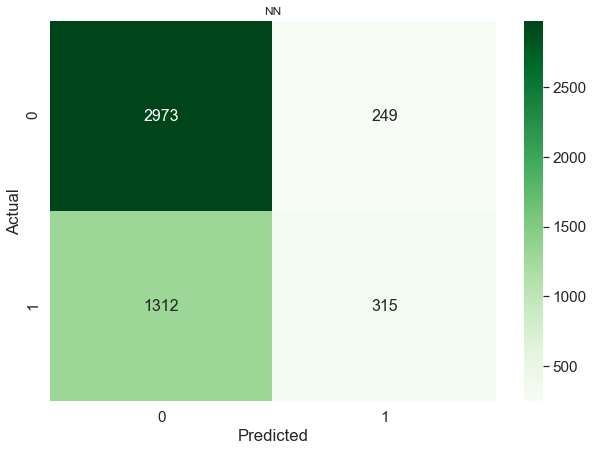

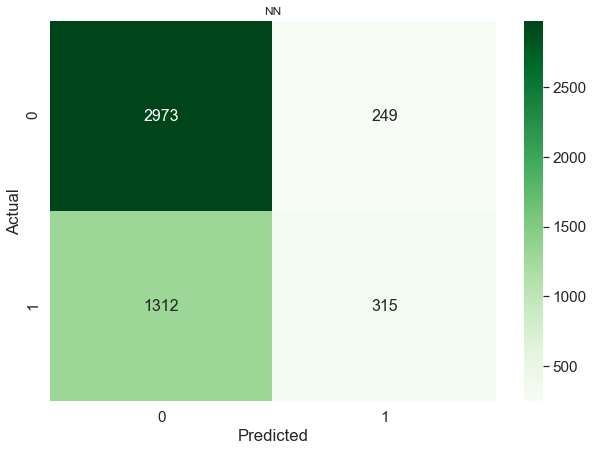

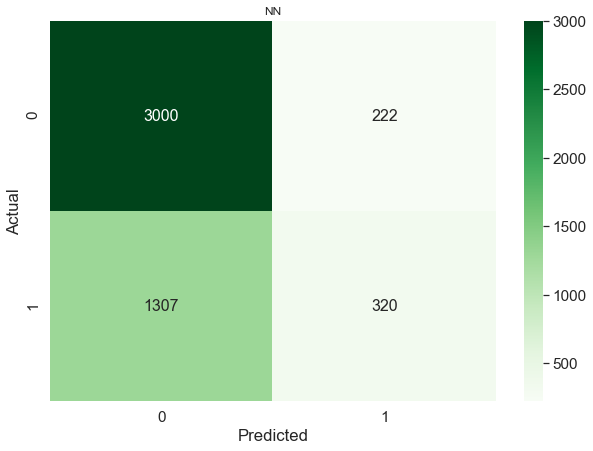

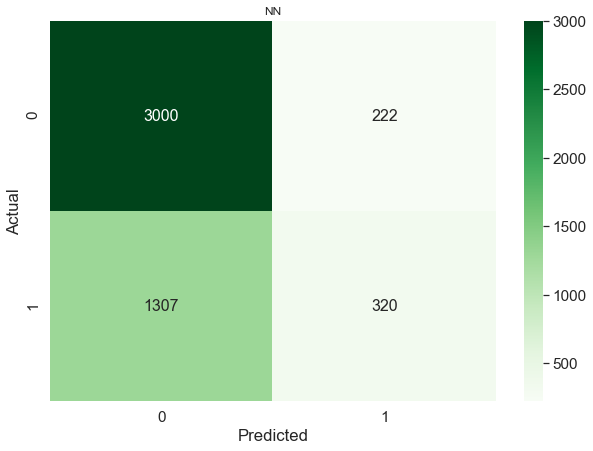

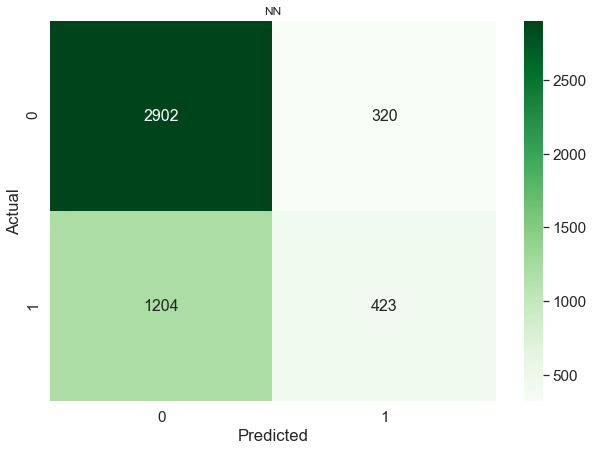

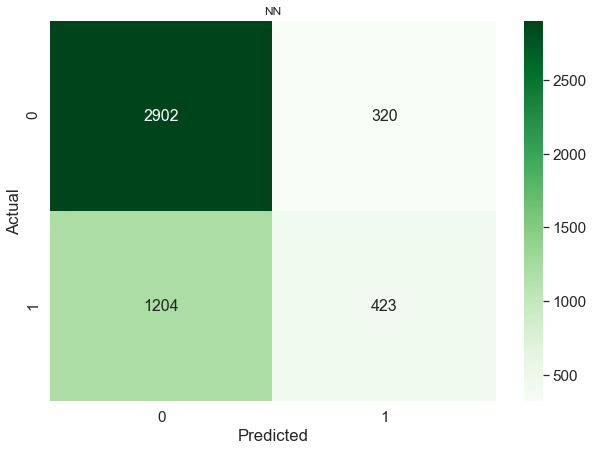

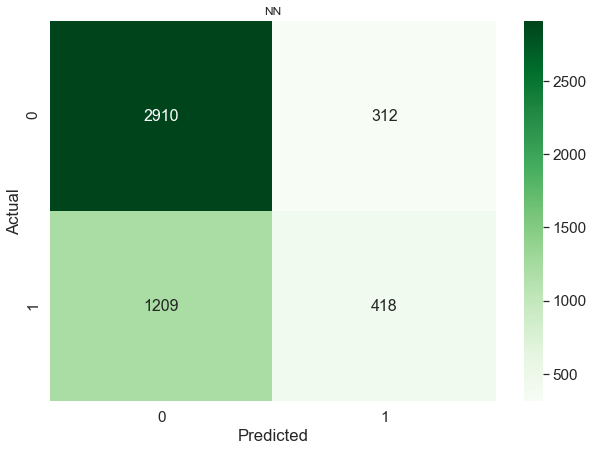

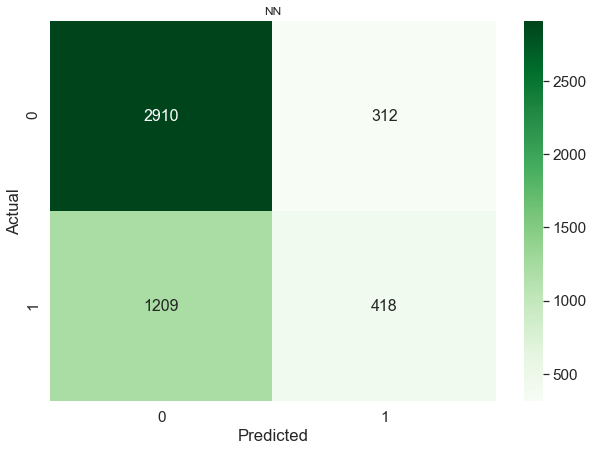

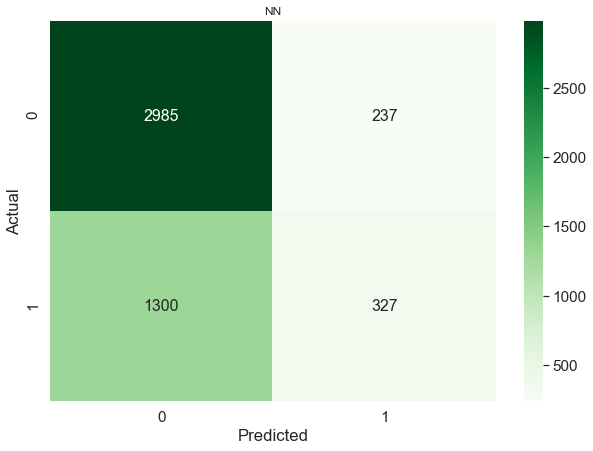

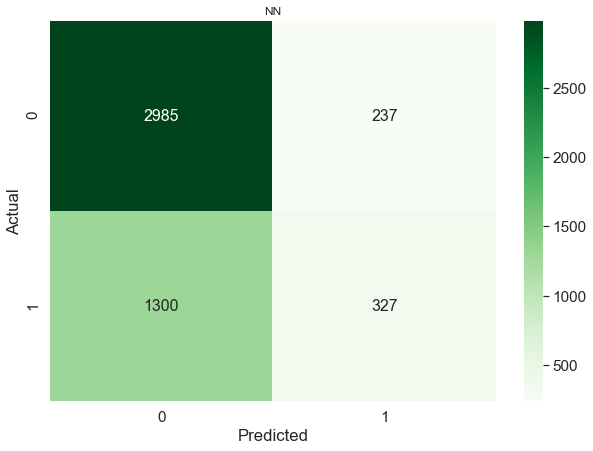

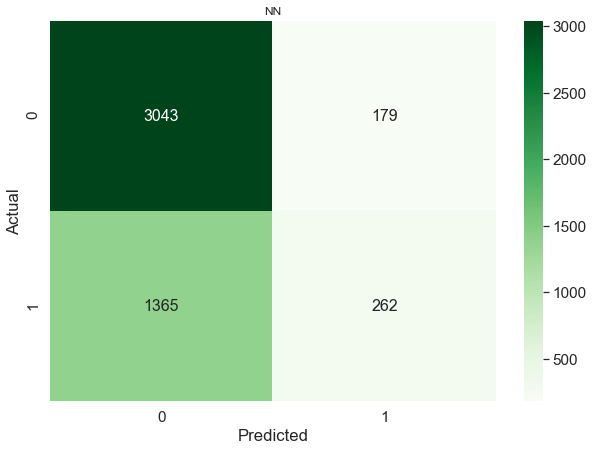

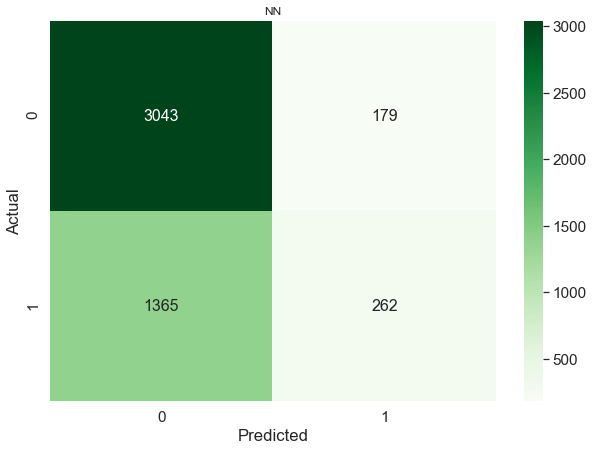

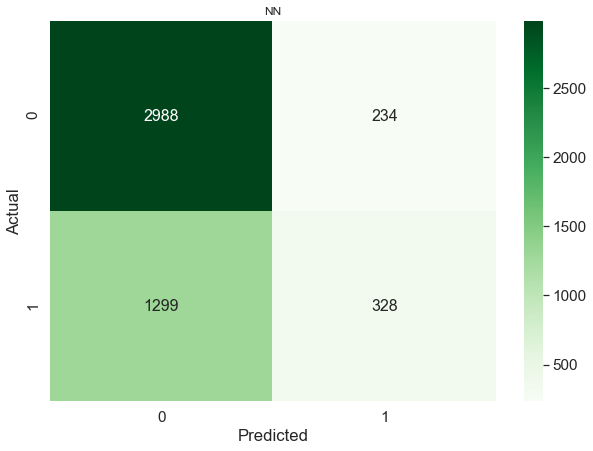

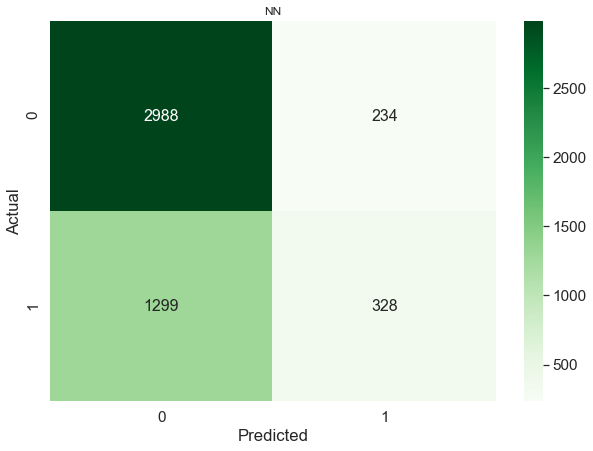

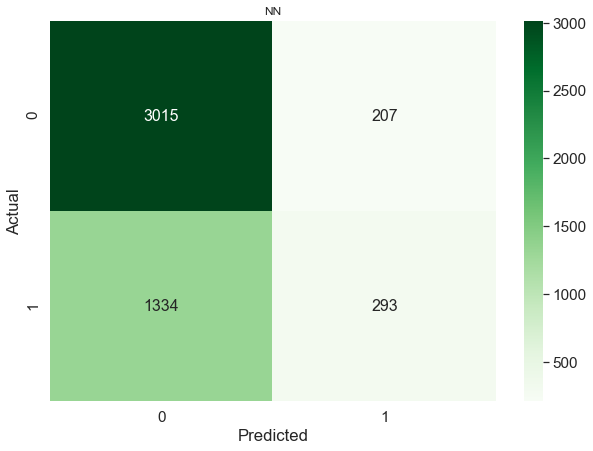

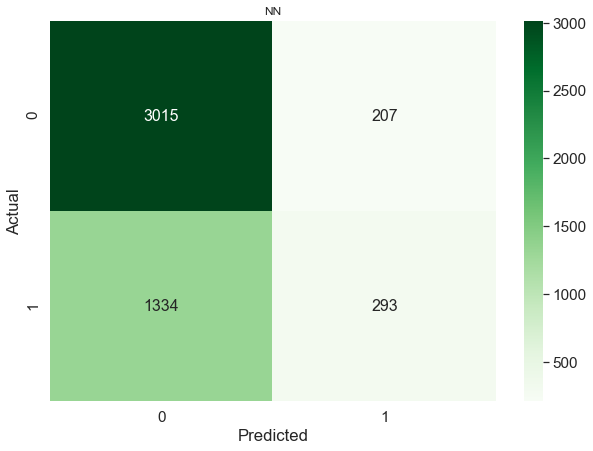

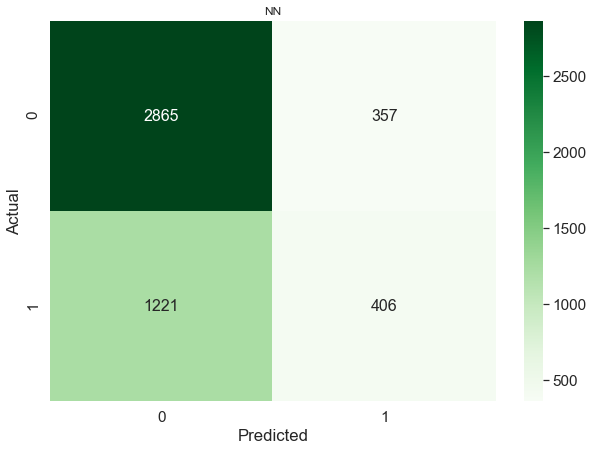

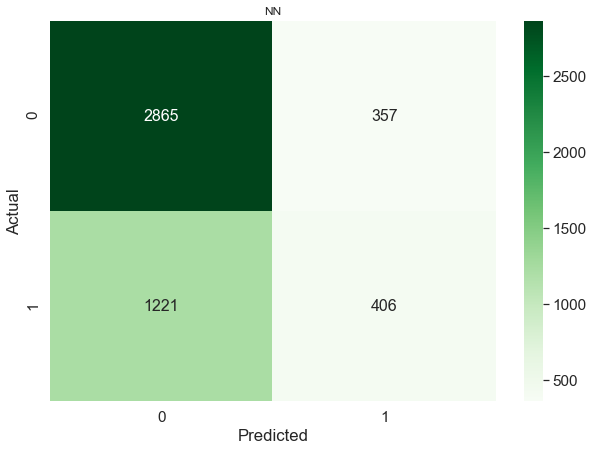

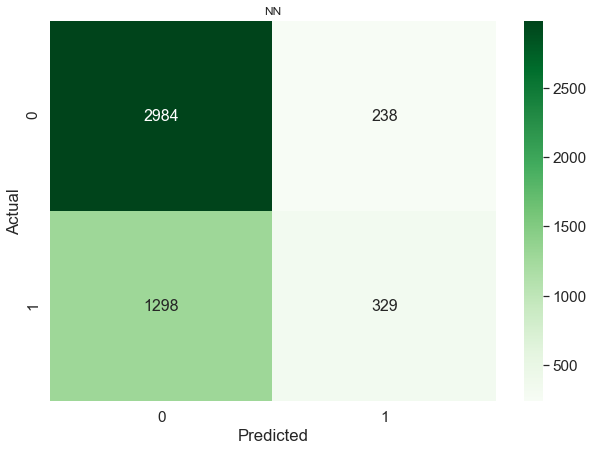

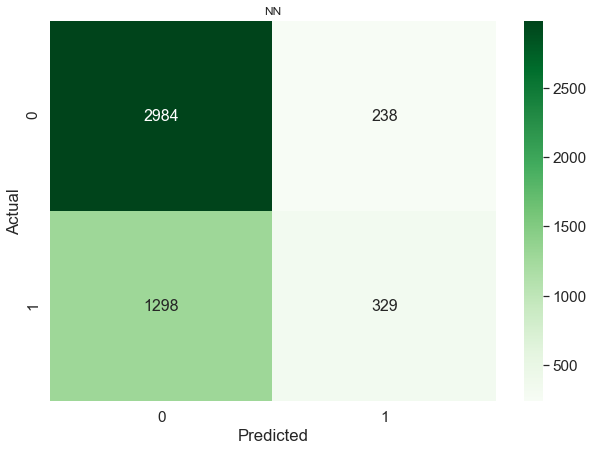

In [75]:
alpha = [.00001, .0001, .001]
hidden_layer_sizes = [5, 7, 10, 15, 20]
params = [(x, y) for x in alpha for y in hidden_layer_sizes]
print(params)
auc_ls = []
f1_ls = []

for i in params:
    nn = MLPClassifier(alpha = i[0], activation='relu', hidden_layer_sizes = i[1])
    nn.fit(X_train, y_train)
    auc = print_metrics(X_test, y_test, nn, "NN")[2]
    f1 = print_metrics(X_test, y_test, nn, "NN")[3]
    auc_ls.append(auc)
    f1_ls.append(f1)

In [81]:
print(auc_ls)
print(f1_ls)

[0.675, 0.67, 0.674, 0.679, 0.663, 0.674, 0.677, 0.678, 0.679, 0.676, 0.672, 0.678, 0.675, 0.664, 0.679]
[0.278, 0.328, 0.296, 0.3, 0.362, 0.288, 0.295, 0.357, 0.355, 0.298, 0.253, 0.3, 0.276, 0.34, 0.3]


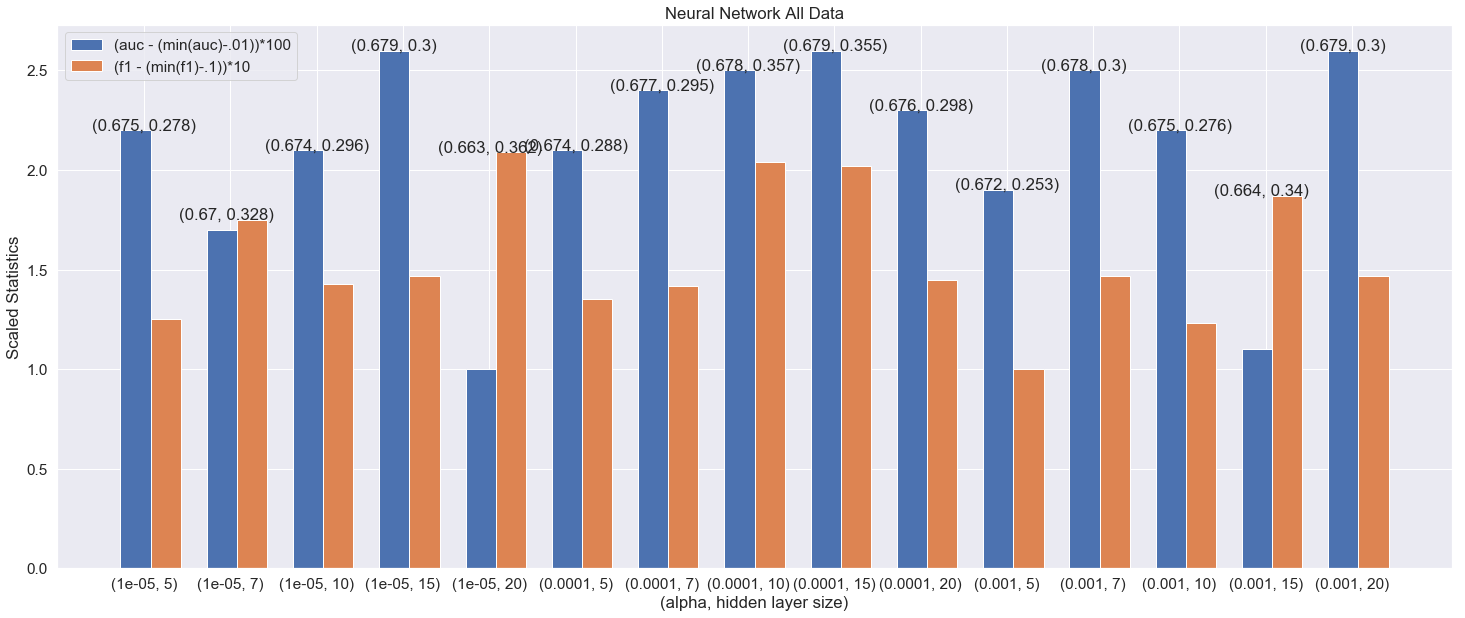

In [131]:
# Scale for plot
scale_auc_ls = (auc_ls - (min(auc_ls)-.01))*100
print(scale_auc_ls)
scale_f1_ls = (f1_ls - (min(f1_ls)-.01))*10
print(scale_f1_ls)

# Plot
n_combos = len(params)
index = np.arange(n_combos)
axes = plt.gca()
bar_width = .35

aucs = plt.bar(index, scale_auc_ls, bar_width, label = "(auc - (min(auc)-.01))*100")
f1s = plt.bar(index+bar_width, scale_f1_ls, bar_width, label = "(f1 - (min(f1)-.1))*10")

plt.xticks(index+.1, params)
for i, v in enumerate(scale_auc_ls):
    plt.text(i - .5, max(scale_auc_ls[i], scale_f1_ls[i]), str((auc_ls[i], f1_ls[i])))

plt.xlabel("(alpha, hidden layer size)")
plt.ylabel("Scaled Statistics")
plt.title("Neural Network All Data")
plt.legend()

In [119]:
nn.predict_proba(X_wimby_2019)

array([[0.89428382, 0.10571618],
       [0.5631078 , 0.4368922 ],
       [0.70963518, 0.29036482],
       [0.8070119 , 0.1929881 ],
       [0.78180678, 0.21819322],
       [0.87844463, 0.12155537],
       [0.7848314 , 0.2151686 ],
       [0.73984905, 0.26015095],
       [0.77721991, 0.22278009],
       [0.58788057, 0.41211943],
       [0.76876301, 0.23123699],
       [0.78021923, 0.21978077],
       [0.6741731 , 0.3258269 ],
       [0.46454235, 0.53545765],
       [0.49815072, 0.50184928],
       [0.50282838, 0.49717162]])